In [121]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [122]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [123]:
# Add the latitudes and longitudes to a list. (unzip)
coordinates = list(lat_lngs)

In [124]:
from citipy import citipy

In [125]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [126]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [127]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c0e5e5bee03520ffc5fddd66b09ac53


In [128]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [129]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zyryanka
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | grand gaube
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | la palma
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | burnie
Processing Record 15 of Set 1 | oktyabrskiy
Processing Record 16 of Set 1 | half moon bay
Processing Record 17 of Set 1 | yar-sale
Processing Record 18 of Set 1 | bensonville
Processing Record 19 of Set 1 | nicoya
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | thompson
Processing Record 23 of Set 1 | 

Processing Record 41 of Set 4 | chuy
Processing Record 42 of Set 4 | rio grande
Processing Record 43 of Set 4 | balkanabat
Processing Record 44 of Set 4 | korla
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | batagay
Processing Record 47 of Set 4 | maniago
Processing Record 48 of Set 4 | bandarbeyla
Processing Record 49 of Set 4 | rungata
City not found. Skipping...
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | ulvik
Processing Record 2 of Set 5 | tubruq
City not found. Skipping...
Processing Record 3 of Set 5 | mujiayingzi
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | san javier
Processing Record 7 of Set 5 | santa elena
Processing Record 8 of Set 5 | doha
Processing Record 9 of Set 5 | necochea
Processing Record 10 of Set 5 | borogontsy
Processing Record 11 of Set 5 | ponta delgada
Processing Record 12 of Set 5 | shimoni
Processing Record 13 of Set 5 | awbari
Pro

Processing Record 30 of Set 8 | north bend
Processing Record 31 of Set 8 | ust-ishim
Processing Record 32 of Set 8 | sitrah
Processing Record 33 of Set 8 | makat
Processing Record 34 of Set 8 | toora-khem
Processing Record 35 of Set 8 | sabha
Processing Record 36 of Set 8 | riyadh
Processing Record 37 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 38 of Set 8 | qaanaaq
Processing Record 39 of Set 8 | olafsvik
Processing Record 40 of Set 8 | vangaindrano
Processing Record 41 of Set 8 | zhanaozen
Processing Record 42 of Set 8 | meulaboh
Processing Record 43 of Set 8 | pitsunda
Processing Record 44 of Set 8 | flinders
Processing Record 45 of Set 8 | porto velho
Processing Record 46 of Set 8 | aden
Processing Record 47 of Set 8 | idenao
Processing Record 48 of Set 8 | te anau
Processing Record 49 of Set 8 | sayan
Processing Record 50 of Set 8 | loandjili
Processing Record 1 of Set 9 | bilibino
Processing Record 2 of Set 9 | norman wells
Processing Record 3 of Set 9 | c

Processing Record 18 of Set 12 | bijie
Processing Record 19 of Set 12 | sorland
Processing Record 20 of Set 12 | port hedland
Processing Record 21 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 22 of Set 12 | daru
Processing Record 23 of Set 12 | samusu
City not found. Skipping...
Processing Record 24 of Set 12 | abakaliki
Processing Record 25 of Set 12 | tabas
Processing Record 26 of Set 12 | tatishchevo
Processing Record 27 of Set 12 | umred
Processing Record 28 of Set 12 | zhucheng
Processing Record 29 of Set 12 | mauraro
Processing Record 30 of Set 12 | sao felix do xingu
Processing Record 31 of Set 12 | puerto pailas
Processing Record 32 of Set 12 | kitaibaraki
Processing Record 33 of Set 12 | nago
Processing Record 34 of Set 12 | russkaya polyana
Processing Record 35 of Set 12 | bathsheba
Processing Record 36 of Set 12 | port hardy
Processing Record 37 of Set 12 | haibowan
City not found. Skipping...
Processing Record 38 of Set 12 | umm lajj
Proc

In [130]:
len(city_data)

563

In [131]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zyryanka,65.75,150.85,49.44,58,100,9.86,RU,2020-07-30 20:08:25
1,Aklavik,68.22,-135.01,68.00,64,90,2.24,CA,2020-07-30 20:08:25
2,Souillac,-20.52,57.52,69.80,88,40,5.82,MU,2020-07-30 20:08:26
3,Grand Gaube,-20.01,57.66,69.01,82,2,1.99,MU,2020-07-30 20:08:26
4,Vaini,-21.20,-175.20,69.80,77,40,10.29,TO,2020-07-30 20:08:26
5,Tuktoyaktuk,69.45,-133.04,62.60,77,90,9.17,CA,2020-07-30 20:08:26
6,Rikitea,-23.12,-134.97,72.77,87,97,13.38,PF,2020-07-30 20:08:26
7,La Palma,33.85,-118.05,91.99,42,1,3.36,US,2020-07-30 20:08:26
8,Katsuura,35.13,140.30,73.40,94,75,3.36,JP,2020-07-30 20:08:26
9,Upernavik,72.79,-56.15,44.13,73,61,2.35,GL,2020-07-30 20:08:26


In [132]:
city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [133]:
city_data_df = city_data_df[city_data]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zyryanka,RU,2020-07-30 20:08:25,65.75,150.85,49.44,58,100,9.86
1,Aklavik,CA,2020-07-30 20:08:25,68.22,-135.01,68.00,64,90,2.24
2,Souillac,MU,2020-07-30 20:08:26,-20.52,57.52,69.80,88,40,5.82
3,Grand Gaube,MU,2020-07-30 20:08:26,-20.01,57.66,69.01,82,2,1.99
4,Vaini,TO,2020-07-30 20:08:26,-21.20,-175.20,69.80,77,40,10.29
...,...,...,...,...,...,...,...,...,...
558,Manggar,ID,2020-07-30 20:09:31,-2.88,108.27,78.67,85,100,10.54
559,Shakawe,BW,2020-07-30 20:09:31,-18.37,21.85,59.27,35,0,4.81
560,Tuy Hoa,VN,2020-07-30 20:08:14,13.08,109.30,77.63,86,100,9.66
561,Zonguldak,TR,2020-07-30 20:06:03,41.25,31.83,62.24,92,0,1.90


In [134]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [135]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [136]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/30/20'

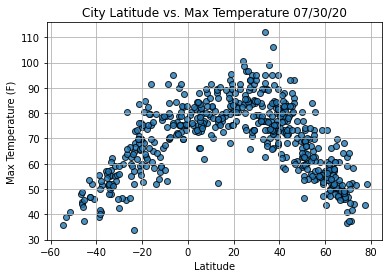

In [137]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

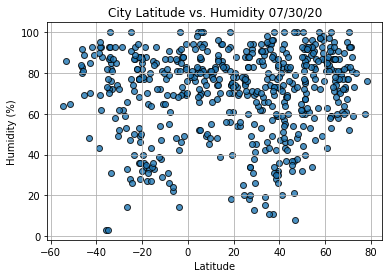

In [138]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

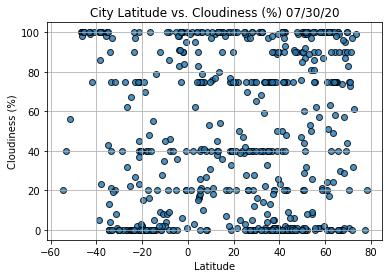

In [139]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

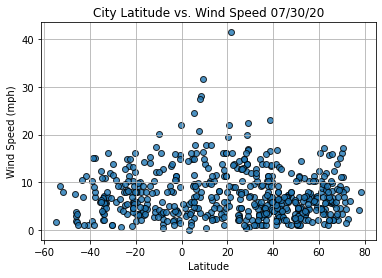

In [140]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    #(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    #regress_values = x_values * slope + intercept
    # Get the equation of the line.
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    #plt.scatter(x_values,y_values)
    #plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    #plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    #plt.xlabel('Latitude')
    #plt.ylabel(y_label)
    #plt.show()

In [172]:
index13 = city_data_df.loc[13]
index13

City                       Burnie
Country                        AU
Date          2020-07-30 20:08:27
Lat                        -41.07
Lng                        145.92
Max Temp                       46
Humidity                       89
Cloudiness                    100
Wind Speed                   1.01
Name: 13, dtype: object

In [173]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
558    False
559    False
560     True
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [183]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zyryanka,RU,2020-07-30 20:08:25,65.75,150.85,49.44,58,100,9.86
1,Aklavik,CA,2020-07-30 20:08:25,68.22,-135.01,68.00,64,90,2.24
5,Tuktoyaktuk,CA,2020-07-30 20:08:26,69.45,-133.04,62.60,77,90,9.17
7,La Palma,US,2020-07-30 20:08:26,33.85,-118.05,91.99,42,1,3.36
8,Katsuura,JP,2020-07-30 20:08:26,35.13,140.30,73.40,94,75,3.36


In [184]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [185]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

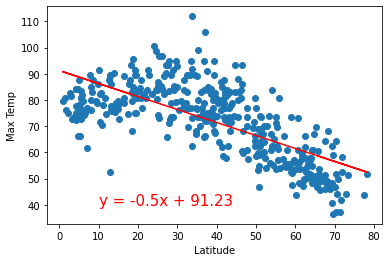

In [186]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

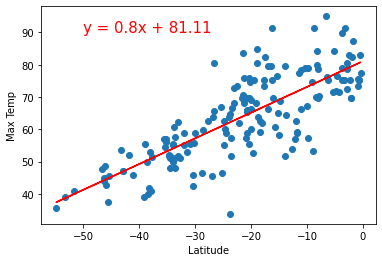

In [187]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

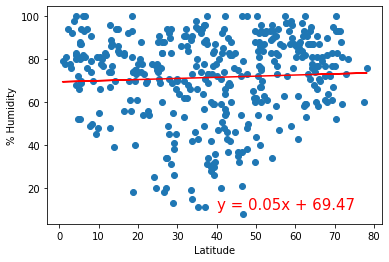

In [193]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

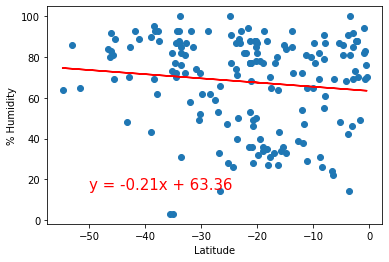

In [195]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

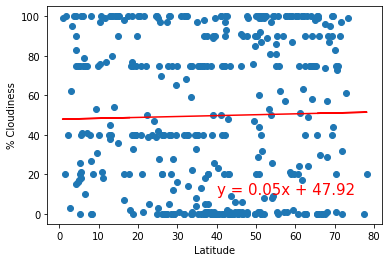

In [196]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for %Cloudiness', '% Cloudiness',(40,10))

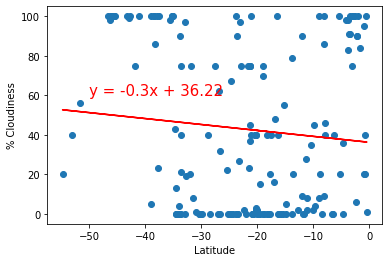

In [198]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

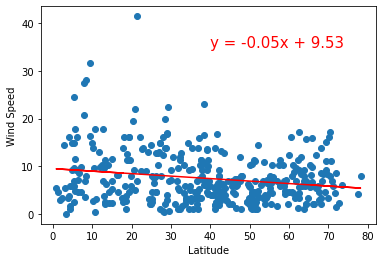

In [200]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

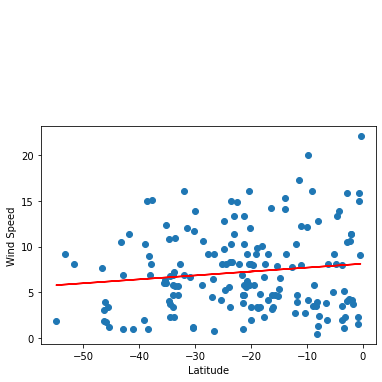

In [202]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))